In [1]:
#Feedforward ANN from Scratch (Python + NumPy)

import numpy as np

# 1. Create a small custom dataset (binary classification)
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int).reshape(-1, 1)  # label=1 if sum > 1 else 0

# 2. Helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8  # to avoid log(0)
    return -np.mean(y_true*np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))

# 3. Initialize weights
input_dim = 2
hidden_dim = 4
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim) * 0.01
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
b2 = np.zeros((1, output_dim))

# 4. Training
lr = 0.1
epochs = 1000

for epoch in range(epochs):
    # ---- Forward ----
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)  # prediction

    # ---- Loss ----
    loss = binary_cross_entropy(y, a2)

    # ---- Backprop ----
    dz2 = a2 - y
    dW2 = a1.T @ dz2 / X.shape[0]
    db2 = np.mean(dz2, axis=0, keepdims=True)

    dz1 = (dz2 @ W2.T) * sigmoid_deriv(z1)
    dW1 = X.T @ dz1 / X.shape[0]
    db1 = np.mean(dz1, axis=0, keepdims=True)

    # ---- Update ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Print every 100 epochs
    if epoch % 100 == 0:
        preds = (a2 > 0.5).astype(int)
        acc = np.mean(preds == y)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}")

# Final evaluation
preds = (a2 > 0.5).astype(int)
print("Final Accuracy:", np.mean(preds == y))


Epoch 0, Loss: 0.6932, Accuracy: 0.43
Epoch 100, Loss: 0.6832, Accuracy: 0.57
Epoch 200, Loss: 0.6829, Accuracy: 0.57
Epoch 300, Loss: 0.6826, Accuracy: 0.57
Epoch 400, Loss: 0.6822, Accuracy: 0.57
Epoch 500, Loss: 0.6815, Accuracy: 0.57
Epoch 600, Loss: 0.6804, Accuracy: 0.57
Epoch 700, Loss: 0.6787, Accuracy: 0.57
Epoch 800, Loss: 0.6760, Accuracy: 0.57
Epoch 900, Loss: 0.6716, Accuracy: 0.57
Final Accuracy: 0.57


Epoch 0, Loss: 0.7204, Accuracy: 0.43
Epoch 100, Loss: 0.0614, Accuracy: 0.98
Epoch 200, Loss: 0.0392, Accuracy: 0.99
Epoch 300, Loss: 0.0302, Accuracy: 0.99
Epoch 400, Loss: 0.0252, Accuracy: 0.99


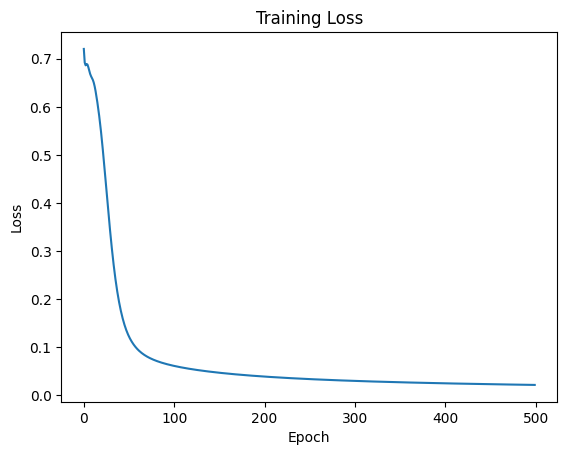

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Dataset
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

# 2. Model
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleANN()

# 3. Loss & optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 4. Training loop
losses = []
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X_t)
    loss = criterion(outputs, y_t)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 100 == 0:
        with torch.no_grad():
            preds = (outputs > 0.5).float()
            acc = (preds == y_t).float().mean()
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {acc:.2f}")

# 5. Save model
torch.save(model.state_dict(), "simple_ann.pth")

# 6. Load model
loaded_model = SimpleANN()
loaded_model.load_state_dict(torch.load("simple_ann.pth"))
loaded_model.eval()

# 7. Plot training loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


Epoch 001 | Train Loss: 0.6538 Acc: 0.5625 | Val Loss: 0.6457 Acc: 0.4750
 --> New best model saved (val_loss: 0.6457)
Epoch 002 | Train Loss: 0.6190 Acc: 0.5387 | Val Loss: 0.6241 Acc: 0.5000
 --> New best model saved (val_loss: 0.6241)
Epoch 003 | Train Loss: 0.5966 Acc: 0.5737 | Val Loss: 0.5992 Acc: 0.5450
 --> New best model saved (val_loss: 0.5992)
Epoch 004 | Train Loss: 0.5743 Acc: 0.6200 | Val Loss: 0.5816 Acc: 0.5700
 --> New best model saved (val_loss: 0.5816)
Epoch 005 | Train Loss: 0.5531 Acc: 0.6500 | Val Loss: 0.5595 Acc: 0.6300
 --> New best model saved (val_loss: 0.5595)
Epoch 006 | Train Loss: 0.5317 Acc: 0.7250 | Val Loss: 0.5371 Acc: 0.7100
 --> New best model saved (val_loss: 0.5371)
Epoch 007 | Train Loss: 0.5100 Acc: 0.7913 | Val Loss: 0.5148 Acc: 0.7400
 --> New best model saved (val_loss: 0.5148)
Epoch 008 | Train Loss: 0.4867 Acc: 0.8037 | Val Loss: 0.4943 Acc: 0.7600
 --> New best model saved (val_loss: 0.4943)
Epoch 009 | Train Loss: 0.4636 Acc: 0.8187 | Val

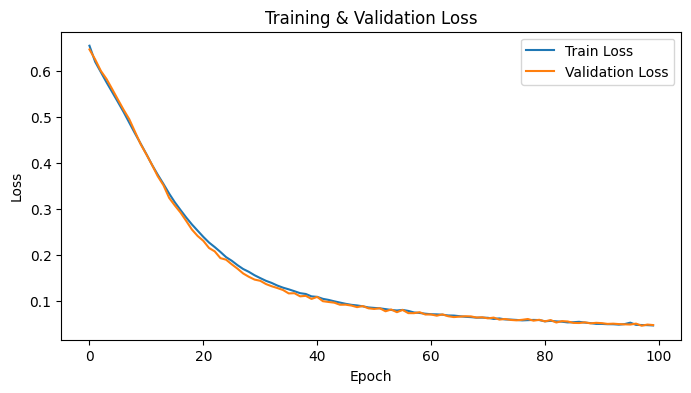

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) Create simple dataset (binary classification)
np.random.seed(42)
X = np.random.rand(1000, 2).astype(np.float32)  # 1000 samples, 2 features, float32 for PyTorch
y = ((X[:, 0] + X[:, 1]) > 1).astype(np.float32).reshape(-1, 1)  # Label=1 if sum of features > 1 else 0

# Split dataset into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Convert numpy arrays to PyTorch tensors
X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)

# Create Dataset and DataLoader objects for batching
batch_size = 64
train_ds = TensorDataset(X_train_t, y_train_t)  # Dataset for training
val_ds = TensorDataset(X_val_t, y_val_t)        # Dataset for validation
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)  # Shuffle training data
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)     # No shuffle for validation

# 2) Define the model architecture
class SimpleANN(nn.Module):
    def __init__(self, hidden_dim=16, use_batchnorm=False):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(2, hidden_dim)  # First fully connected layer (input to hidden)
        # BatchNorm can be enabled here if needed:
        # self.bn1 = nn.BatchNorm1d(hidden_dim) if use_batchnorm else None
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer
        # self.bn2 = nn.BatchNorm1d(hidden_dim) if use_batchnorm else None
        self.fc3 = nn.Linear(hidden_dim, 1)  # Output layer (1 output for binary classification)
        self.act = nn.ReLU()  # ReLU activation for hidden layers
        self.out_act = nn.Sigmoid()  # Sigmoid activation for output (probability)

    def forward(self, x):
        x = self.fc1(x)  # Linear transform
        # if self.bn1 is not None: x = self.bn1(x)  # Optional BatchNorm
        x = self.act(x)  # Apply ReLU
        x = self.fc2(x)  # Linear transform second hidden layer
        # if self.bn2 is not None: x = self.bn2(x)  # Optional BatchNorm
        x = self.act(x)  # Apply ReLU
        x = self.fc3(x)  # Final linear transform to output
        x = self.out_act(x)  # Sigmoid to get probability
        return x

# Detect if CUDA GPU is available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleANN(hidden_dim=32).to(device)  # Create model and send to device (GPU or CPU)

# 3) Initialize weights using He initialization (good for ReLU activations)
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')  # He init for weights
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero

model.apply(init_weights)  # Apply initialization function to all layers

# 4) Define loss function, optimizer, scheduler, and weight decay (L2 regularization)
criterion = nn.BCELoss()  # Binary cross entropy loss (for binary classification)
lr = 1e-3  # Learning rate
weight_decay = 1e-4  # L2 penalty (weight decay) to reduce overfitting
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)  # Reduce LR when val loss plateaus (no verbose arg for compatibility)

# 5) Training loop with early stopping
num_epochs = 100  # Max number of epochs to train
patience = 12  # Number of epochs with no improvement before stopping early
best_val_loss = float('inf')  # Track best validation loss
epochs_no_improve = 0  # Counter for early stopping
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}  # Store loss and acc per epoch
save_path = "best_simple_ann.pth"  # File path to save best model

for epoch in range(1, num_epochs + 1):
    # ---- Training phase ----
    model.train()  # Set model to training mode
    running_loss = 0.0  # Sum of losses over batches
    running_corrects = 0  # Number of correct predictions
    total = 0  # Total samples processed

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)  # Move batch to device

        optimizer.zero_grad()  # Clear previous gradients
        preds = model(xb)  # Forward pass
        loss = criterion(preds, yb)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item() * xb.size(0)  # Accumulate loss scaled by batch size
        preds_label = (preds.detach() > 0.5).float()  # Convert probabilities to binary predictions
        running_corrects += (preds_label == yb).sum().item()  # Count correct predictions
        total += xb.size(0)  # Count samples

    train_loss = running_loss / total  # Average loss over epoch
    train_acc = running_corrects / total  # Accuracy over epoch

    # ---- Validation phase ----
    model.eval()  # Set model to evaluation mode (disables dropout, batchnorm updates)
    val_running_loss = 0.0
    val_running_corrects = 0
    val_total = 0

    with torch.no_grad():  # No gradients needed for validation
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_running_loss += loss.item() * xb.size(0)
            preds_label = (preds > 0.5).float()
            val_running_corrects += (preds_label == yb).sum().item()
            val_total += xb.size(0)

    val_loss = val_running_loss / val_total
    val_acc = val_running_corrects / val_total

    # Save loss and accuracy for plotting later
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    # Step the LR scheduler and print if LR changed
    old_lr = optimizer.param_groups[0]['lr']  # Current LR before scheduler step
    scheduler.step(val_loss)  # Update LR based on val loss plateau
    new_lr = optimizer.param_groups[0]['lr']  # LR after scheduler step
    if new_lr != old_lr:
        print(f"Learning rate reduced to {new_lr:.6f}")

    # Print epoch summary
    print(f"Epoch {epoch:03d} | Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    # Early stopping check: if validation loss improved, save model and reset counter
    if val_loss < best_val_loss - 1e-6:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_loss': val_loss
        }, save_path)
        print(f" --> New best model saved (val_loss: {val_loss:.4f})")
    else:
        epochs_no_improve += 1
        # Stop training if no improvement for 'patience' epochs
        if epochs_no_improve >= patience:
            print(f"Early stopping triggered after {epoch} epochs.")
            break

# 6) Load the best saved model for final evaluation
ckpt = torch.load(save_path, map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

# Evaluation function to calculate accuracy and RMSE on given DataLoader
def evaluate(loader):
    preds_all = []
    targets_all = []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            preds_all.append(preds.cpu().numpy())
            targets_all.append(yb.cpu().numpy())
    preds_all = np.vstack(preds_all)
    targets_all = np.vstack(targets_all)
    preds_label = (preds_all > 0.5).astype(np.float32)  # Binary predictions
    acc = (preds_label == targets_all).mean()  # Accuracy
    rmse = np.sqrt(((preds_all - targets_all) ** 2).mean())  # Root mean squared error
    return acc, rmse

# Evaluate on training and validation sets
train_acc, train_rmse = evaluate(train_loader)
val_acc, val_rmse = evaluate(val_loader)

print(f"\nFinal best-model evaluation -> Train Acc: {train_acc:.4f} RMSE: {train_rmse:.4f} | Val Acc: {val_acc:.4f} RMSE: {val_rmse:.4f}")

# 7) Plot training and validation loss curves for visualization
plt.figure(figsize=(8,4))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


In [7]:


import torch
import torch.nn as nn

leaky_relu = nn.LeakyReLU(negative_slope=0.01)
x = torch.tensor([-1.0, 0.0, 1.0])
print(leaky_relu(x))





tensor([-0.0100,  0.0000,  1.0000])


In [ ]:
softmax = nn.Softmax(dim=1)
logits = torch.tensor([[1.0, 2.0, 3.0]])
probs = softmax(logits)
print(probs)


tensor([[0.0900, 0.2447, 0.6652]])


In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [11]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)


In [12]:
dropout = nn.Dropout(p=0.5)
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    dropout,
    nn.Linear(20, 1)
)


In [13]:
bn = nn.BatchNorm1d(num_features=20)


In [14]:
def xavier_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model.apply(xavier_init)


Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=20, out_features=1, bias=True)
)

In [15]:
def he_init(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        nn.init.zeros_(m.bias)

model.apply(he_init)


Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=20, out_features=1, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
logits = torch.randn(3, 5)
targets = torch.tensor([1, 0, 4])
loss = criterion(logits, targets)
print(loss.item())


2.713693618774414


In [18]:
criterion = nn.MSELoss()
outputs = torch.tensor([2.5, 0.0, 2.1])
targets = torch.tensor([3.0, -0.5, 2.0])
loss = criterion(outputs, targets)
print(loss.item())


0.17000000178813934


In [19]:
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)


tensor(0.)

In [21]:
def numerical_grad_check(model, loss_fn, x, y, param_name, epsilon=1e-5):
    model.eval()
    param = dict(model.named_parameters())[param_name]
    param_data = param.data.clone()
    grad_approx = torch.zeros_like(param_data)
    for idx in range(param_data.numel()):
        orig = param_data.view(-1)[idx].item()
        param_data.view(-1)[idx] = orig + epsilon
        param.data = param_data
        loss_plus = loss_fn(model(x), y).item()
        param_data.view(-1)[idx] = orig - epsilon
        param.data = param_data
        loss_minus = loss_fn(model(x), y).item()
        grad_approx.view(-1)[idx] = (loss_plus - loss_minus) / (2 * epsilon)
        param_data.view(-1)[idx] = orig
    param.data = param_data
    return grad_approx


In [23]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, 12), nn.ReLU(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), nn.ReLU(),
            nn.Linear(12, 64), nn.ReLU(),
            nn.Linear(64, 128), nn.ReLU(),
            nn.Linear(128, 784), nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
# Training with Dropout & BatchNorm Example
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Dummy data
X = np.random.rand(1000, 10).astype(np.float32)
y = (X.sum(axis=1) > 5).astype(np.float32).reshape(-1, 1)

X_t = torch.from_numpy(X)
y_t = torch.from_numpy(y)

dataset = TensorDataset(X_t, y_t)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Model with Dropout and BatchNorm
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 50)
        self.bn1 = nn.BatchNorm1d(50)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(50, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.act(x)

model = Model()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(20):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1} Loss: {total_loss/len(dataset):.4f}")


Epoch 1 Loss: 0.7060
Epoch 2 Loss: 0.6486
Epoch 3 Loss: 0.5944
Epoch 4 Loss: 0.5413
Epoch 5 Loss: 0.4985
Epoch 6 Loss: 0.4596
Epoch 7 Loss: 0.4171
Epoch 8 Loss: 0.3814
Epoch 9 Loss: 0.3511
Epoch 10 Loss: 0.3152
Epoch 11 Loss: 0.2896
Epoch 12 Loss: 0.2711
Epoch 13 Loss: 0.2529
Epoch 14 Loss: 0.2424
Epoch 15 Loss: 0.2317
Epoch 16 Loss: 0.2099
Epoch 17 Loss: 0.2130
Epoch 18 Loss: 0.2147
Epoch 19 Loss: 0.1806
Epoch 20 Loss: 0.1750


In [25]:
# Training with Xavier Initialization & SGD + Momentum

import torch.nn.init as init

def xavier_init(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.zeros_(m.bias)

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 30)
        self.fc2 = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNN()
model.apply(xavier_init)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.BCELoss()

for epoch in range(30):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1} Loss: {total_loss/len(dataset):.4f}")


Epoch 1 Loss: 0.6904
Epoch 2 Loss: 0.6801
Epoch 3 Loss: 0.6686
Epoch 4 Loss: 0.6569
Epoch 5 Loss: 0.6461
Epoch 6 Loss: 0.6333
Epoch 7 Loss: 0.6213
Epoch 8 Loss: 0.6087
Epoch 9 Loss: 0.5959
Epoch 10 Loss: 0.5833
Epoch 11 Loss: 0.5694
Epoch 12 Loss: 0.5551
Epoch 13 Loss: 0.5400
Epoch 14 Loss: 0.5253
Epoch 15 Loss: 0.5091
Epoch 16 Loss: 0.4936
Epoch 17 Loss: 0.4772
Epoch 18 Loss: 0.4614
Epoch 19 Loss: 0.4453
Epoch 20 Loss: 0.4294
Epoch 21 Loss: 0.4143
Epoch 22 Loss: 0.3984
Epoch 23 Loss: 0.3838
Epoch 24 Loss: 0.3706
Epoch 25 Loss: 0.3569
Epoch 26 Loss: 0.3444
Epoch 27 Loss: 0.3324
Epoch 28 Loss: 0.3213
Epoch 29 Loss: 0.3105
Epoch 30 Loss: 0.3053


In [26]:
#3. Training with Gradient Clipping and Learning Rate Scheduler (StepLR)

model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
criterion = nn.BCELoss()

for epoch in range(40):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    scheduler.step()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(dataset):.4f} LR: {scheduler.get_last_lr()[0]:.5f}")


Epoch 1 Loss: 0.6828 LR: 0.01000
Epoch 2 Loss: 0.6448 LR: 0.01000
Epoch 3 Loss: 0.6032 LR: 0.01000
Epoch 4 Loss: 0.5496 LR: 0.01000
Epoch 5 Loss: 0.4850 LR: 0.01000
Epoch 6 Loss: 0.4182 LR: 0.01000
Epoch 7 Loss: 0.3591 LR: 0.01000
Epoch 8 Loss: 0.3103 LR: 0.01000
Epoch 9 Loss: 0.2777 LR: 0.01000
Epoch 10 Loss: 0.2478 LR: 0.00100
Epoch 11 Loss: 0.2267 LR: 0.00100
Epoch 12 Loss: 0.2243 LR: 0.00100
Epoch 13 Loss: 0.2219 LR: 0.00100
Epoch 14 Loss: 0.2202 LR: 0.00100
Epoch 15 Loss: 0.2197 LR: 0.00100
Epoch 16 Loss: 0.2170 LR: 0.00100
Epoch 17 Loss: 0.2141 LR: 0.00100
Epoch 18 Loss: 0.2124 LR: 0.00100
Epoch 19 Loss: 0.2109 LR: 0.00100
Epoch 20 Loss: 0.2086 LR: 0.00010
Epoch 21 Loss: 0.2072 LR: 0.00010
Epoch 22 Loss: 0.2070 LR: 0.00010
Epoch 23 Loss: 0.2068 LR: 0.00010
Epoch 24 Loss: 0.2066 LR: 0.00010
Epoch 25 Loss: 0.2064 LR: 0.00010
Epoch 26 Loss: 0.2063 LR: 0.00010
Epoch 27 Loss: 0.2061 LR: 0.00010
Epoch 28 Loss: 0.2059 LR: 0.00010
Epoch 29 Loss: 0.2057 LR: 0.00010
Epoch 30 Loss: 0.2056 L

In [27]:
#4. Simple Autoencoder Training on Random Data
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

X_ae = torch.rand(500, 20)
dataset_ae = TensorDataset(X_ae, X_ae)  # Autoencoder input=target
loader_ae = DataLoader(dataset_ae, batch_size=32, shuffle=True)

model_ae = Autoencoder()
criterion_ae = nn.MSELoss()
optimizer_ae = optim.Adam(model_ae.parameters(), lr=0.005)

for epoch in range(50):
    model_ae.train()
    total_loss = 0
    for xb, yb in loader_ae:
        optimizer_ae.zero_grad()
        out = model_ae(xb)
        loss = criterion_ae(out, yb)
        loss.backward()
        optimizer_ae.step()
        total_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1} Loss: {total_loss/len(dataset_ae):.4f}")


Epoch 1 Loss: 0.0851
Epoch 2 Loss: 0.0825
Epoch 3 Loss: 0.0807
Epoch 4 Loss: 0.0784
Epoch 5 Loss: 0.0759
Epoch 6 Loss: 0.0736
Epoch 7 Loss: 0.0718
Epoch 8 Loss: 0.0706
Epoch 9 Loss: 0.0701
Epoch 10 Loss: 0.0698
Epoch 11 Loss: 0.0695
Epoch 12 Loss: 0.0693
Epoch 13 Loss: 0.0691
Epoch 14 Loss: 0.0690
Epoch 15 Loss: 0.0689
Epoch 16 Loss: 0.0687
Epoch 17 Loss: 0.0685
Epoch 18 Loss: 0.0684
Epoch 19 Loss: 0.0683
Epoch 20 Loss: 0.0683
Epoch 21 Loss: 0.0682
Epoch 22 Loss: 0.0682
Epoch 23 Loss: 0.0680
Epoch 24 Loss: 0.0680
Epoch 25 Loss: 0.0679
Epoch 26 Loss: 0.0679
Epoch 27 Loss: 0.0678
Epoch 28 Loss: 0.0677
Epoch 29 Loss: 0.0677
Epoch 30 Loss: 0.0677
Epoch 31 Loss: 0.0676
Epoch 32 Loss: 0.0675
Epoch 33 Loss: 0.0675
Epoch 34 Loss: 0.0675
Epoch 35 Loss: 0.0675
Epoch 36 Loss: 0.0675
Epoch 37 Loss: 0.0675
Epoch 38 Loss: 0.0674
Epoch 39 Loss: 0.0674
Epoch 40 Loss: 0.0674
Epoch 41 Loss: 0.0674
Epoch 42 Loss: 0.0673
Epoch 43 Loss: 0.0675
Epoch 44 Loss: 0.0674
Epoch 45 Loss: 0.0672
Epoch 46 Loss: 0.06

In [28]:
#5. RNN Training (Backprop Through Time)
seq_len = 5
input_size = 3
hidden_size = 4
batch_size = 2

rnn = nn.RNN(input_size, hidden_size, batch_first=True)
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

# Random data: batch_size x seq_len x input_size
X_rnn = torch.randn(batch_size, seq_len, input_size)
y_rnn = torch.randn(batch_size, seq_len, hidden_size)

for epoch in range(30):
    optimizer.zero_grad()
    out, hn = rnn(X_rnn)
    loss = criterion(out, y_rnn)
    loss.backward()  # PyTorch does BPTT automatically
    optimizer.step()
    print(f"Epoch {epoch+1} Loss: {loss.item():.4f}")


Epoch 1 Loss: 1.0081
Epoch 2 Loss: 0.9794
Epoch 3 Loss: 0.9521
Epoch 4 Loss: 0.9263
Epoch 5 Loss: 0.9022
Epoch 6 Loss: 0.8798
Epoch 7 Loss: 0.8591
Epoch 8 Loss: 0.8398
Epoch 9 Loss: 0.8218
Epoch 10 Loss: 0.8050
Epoch 11 Loss: 0.7891
Epoch 12 Loss: 0.7739
Epoch 13 Loss: 0.7594
Epoch 14 Loss: 0.7455
Epoch 15 Loss: 0.7322
Epoch 16 Loss: 0.7196
Epoch 17 Loss: 0.7076
Epoch 18 Loss: 0.6962
Epoch 19 Loss: 0.6856
Epoch 20 Loss: 0.6756
Epoch 21 Loss: 0.6664
Epoch 22 Loss: 0.6578
Epoch 23 Loss: 0.6500
Epoch 24 Loss: 0.6429
Epoch 25 Loss: 0.6364
Epoch 26 Loss: 0.6304
Epoch 27 Loss: 0.6250
Epoch 28 Loss: 0.6199
Epoch 29 Loss: 0.6153
Epoch 30 Loss: 0.6108
